#  Objective
The primary objective of this project is to explore the relationship between trader performance and market sentiment. By analyzing trading behavior alongside sentiment classifications (like Fear, Greed, Extreme Fear, etc.), the goal is to uncover hidden patterns and trends that affect profitability and decision-making.

Through detailed Exploratory Data Analysis (EDA), data merging, and hypothesis testing, this project aims to deliver data-driven insights that can help design smarter, sentiment-aware trading strategies.



# Final Merged EDA and Analysis

This notebook contains the full analysis based on the merged dataset of:
- historical_data
- fear_greed_index

Individual EDA was performed separately and key features were extracted and merged for final analysis.
**Merged the data based on the `date` column** (common in both datasets).
- Removed missing or incomplete records using the following code:
  ```python
  merged_sentiment_df = merged_df.dropna(subset=['value', 'classification'])


All insights, hypothesis testing, and conclusions are based on this merged view to reflect real-world impact of sentiment on trading behavior.



In [2]:
import pandas as pd

# Step 1: Load both datasets
trader_df = pd.read_csv("historical_data.csv")   
fear_df = pd.read_csv('fear_greed_index.csv')  

In [3]:
print(trader_df.columns)


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')


In [4]:
# Convert timestamp to datetime and extract date
trader_df['date'] = pd.to_datetime(trader_df['Timestamp IST'], errors='coerce').dt.date


In [5]:

fear_df['date'] = pd.to_datetime(fear_df['timestamp'], unit='s').dt.date



In [6]:
print(trader_df[['date']].head())
print(fear_df[['date']].head())


         date
0  2024-02-12
1  2024-02-12
2  2024-02-12
3  2024-02-12
4  2024-02-12
         date
0  2018-02-01
1  2018-02-02
2  2018-02-03
3  2018-02-04
4  2018-02-05


In [7]:
print(fear_df['date'].min(), fear_df['date'].max())


2018-02-01 2025-05-02


In [8]:
merged_df = pd.merge(trader_df, fear_df[['date', 'value', 'classification']], on='date', how='left')


In [9]:
merged_df.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,70.0,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,70.0,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,70.0,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,70.0,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,70.0,Greed


In [10]:
merged_df.info()
merged_df.shape
merged_df.columns
print(merged_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
 16  date              79

In [11]:
merged_df.isnull().sum()
merged_df.duplicated().sum()


0

In [12]:
print("\nMissing Values:\n", merged_df.isnull().sum())


Missing Values:
 Account                  0
Coin                     0
Execution Price          0
Size Tokens              0
Size USD                 0
Side                     0
Timestamp IST            0
Start Position           0
Direction                0
Closed PnL               0
Transaction Hash         0
Order ID                 0
Crossed                  0
Fee                      0
Trade ID                 0
Timestamp                0
date                131999
value               175360
classification      175360
dtype: int64


In [13]:
merged_sentiment_df = merged_df.dropna(subset=['value', 'classification'])
# This cleaned dataset (merged_sentiment_df) was used for Exploratory Data Analysis (EDA), statistical testing, and deriving insights regarding how-
# -traders behave under different market sentiments like Fear, Greed, Extreme Fear, etc.



In [14]:
merged_sentiment_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,70.0,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,70.0,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,70.0,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,70.0,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,70.0,Greed


In [15]:
merged_sentiment_df.describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp,value
count,35864.000000,3.586400e+04,3.586400e+04,3.586400e+04,35864.000000,3.586400e+04,35864.000000,3.586400e+04,3.586400e+04,35864.00000
mean,7596.431745,1.004709e+04,4.920359e+03,2.701678e+04,101.070948,5.844251e+10,1.028091,5.619946e+14,1.732824e+12,51.33496
std,23547.203213,2.060973e+05,2.203314e+04,4.308246e+05,1364.610762,2.240666e+10,4.937482,3.262737e+14,1.082266e+10,22.06305
min,0.000005,5.630000e-06,0.000000e+00,-1.050000e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12,15.00000
25%,3.245975,2.588700e+00,1.665300e+02,-2.638983e+02,0.000000,5.240387e+10,0.012518,2.780000e+14,1.730000e+12,28.00000
50%,16.390000,2.820000e+01,5.979050e+02,7.010137e+01,0.000000,6.815193e+10,0.084384,5.620000e+14,1.740000e+12,49.00000
75%,172.590000,1.990000e+02,2.220243e+03,1.090053e+04,10.735428,7.641909e+10,0.398132,8.460000e+14,1.740000e+12,72.00000
max,103265.000000,1.582244e+07,1.190250e+06,3.050948e+07,71535.716740,9.014923e+10,212.298921,1.130000e+15,1.750000e+12,90.00000


The trader dataset shows that trading activity ranges from very small to very large. Most trades happen at lower prices, but some go over $100,000, which increases the average. The number of tokens traded also varies a lot — from almost zero to over 15 million — meaning some traders are making huge trades.

The value of each trade in dollars is usually around $4,920, but some reach more than $1.19 million, showing that big trades do happen sometimes. Profit and loss (PnL) also changes a lot — while most trades make very small profits or losses (or break even), some make big profits or losses, like -$117,990 or +$71,535.

Trading fees are usually low (around $0.08), but they can go as high as $212 when the trade is large. The 'value' column, which shows market sentiment, ranges from 15 to 90 — this includes all kinds of market moods, from extreme fear to extreme greed.

In short, most traders are making small and safe trades, but the data also shows a few very large and risky trades, probably by big investors or institutions.










In [16]:
print(merged_sentiment_df.columns.tolist())

['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp', 'date', 'value', 'classification']


In [17]:

merged_sentiment_df.rename(columns={
    'Execution Price': 'price',
    'Size Tokens': 'size_token',
    'Size USD': 'trade_value_usd',
    'Closed PnL': 'pnl',
    'Fee': 'fee'
}, inplace=True)


C:\Users\owner\AppData\Local\Temp\ipykernel_744\2712142306.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_sentiment_df.rename(columns={


In [18]:
merged_sentiment_df = merged_sentiment_df.copy()

merged_sentiment_df.rename(columns={
    'Execution Price': 'price',
    'Size Tokens': 'size_token',
    'Size USD': 'trade_value_usd',
    'Closed PnL': 'pnl',
    'Fee': 'fee'
}, inplace=True)


## Average Trading Profit/Loss by Market Sentiment (Fear & Greed Index)

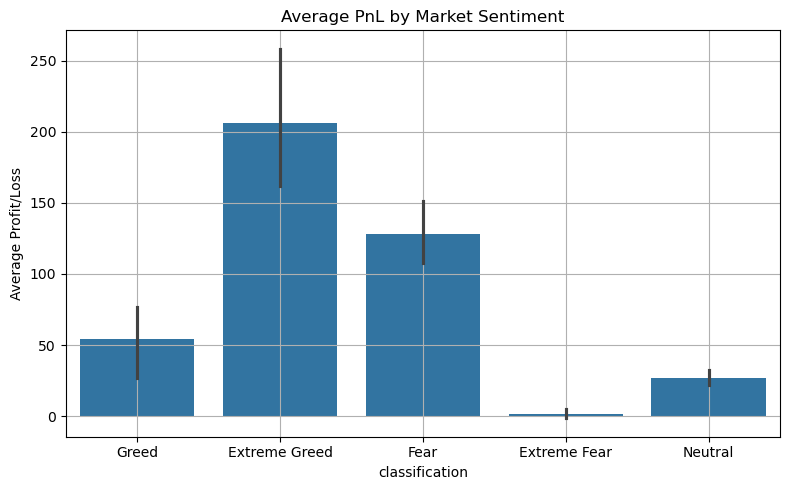

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(x='classification', y='pnl', data=merged_sentiment_df)
plt.title('Average PnL by Market Sentiment')
plt.ylabel('Average Profit/Loss')
plt.grid(True)
plt.tight_layout()
plt.show()



# 1. ANOVA for Average PnL by Market Sentiment

In [20]:
from scipy.stats import f_oneway

# Extract PnL for each sentiment
sentiments = merged_sentiment_df['classification'].unique()
pnl_by_sentiment = [merged_sentiment_df[merged_sentiment_df['classification'] == sent]['pnl'].dropna() for sent in sentiments]

# Perform ANOVA
f_stat, p_value = f_oneway(*pnl_by_sentiment)
print(f"ANOVA - F-statistic: {f_stat}, p-value: {p_value}")
# If p_value < 0.05, reject H0 (significant difference)

ANOVA - F-statistic: 18.150894970637562, p-value: 6.624400733621604e-15


### Hypothesis Testing using ANOVA
- H₀ (Null Hypothesis): Market sentiment has no significant effect on average profit/loss.

-H₁ (Alternative Hypothesis): Market sentiment affects average profit/loss.

- Result:

- F-statistic = 18.15

- p-value = 6.62 × 10⁻¹⁵

- Since p-value < 0.05, we reject H₀.
-  Insight: Market sentiment significantly impacts trading outcomes. Traders perform differently depending on whether the market is in 'Fear', 'Greed', or other states.



## Based on the "Average PnL by Market Sentiment" chart, here are some insights:

- Extreme Greed shows the highest average profit/loss (PnL) at around 200, indicating strong positive returns during periods of extreme market optimism.
- Fear follows with a moderate average PnL of approximately 100, suggesting decent profitability during fearful market conditions.
- Greed has a lower average PnL of about 50, showing moderate gains in less intense optimistic periods.
- Neutral sentiment yields the lowest average PnL, close to 0, indicating minimal profit or loss in balanced market conditions.
- Extreme Fear stands out with a negative average PnL (near 0 with a red marker), hinting at potential losses during highly fearful market phases.
- This suggests that extreme market sentiments (especially greed) tend to correlate with higher profitability, while neutral and extremely fearful conditions are less favorable.

## Trade Value Distribution Across Market Sentiment Levels

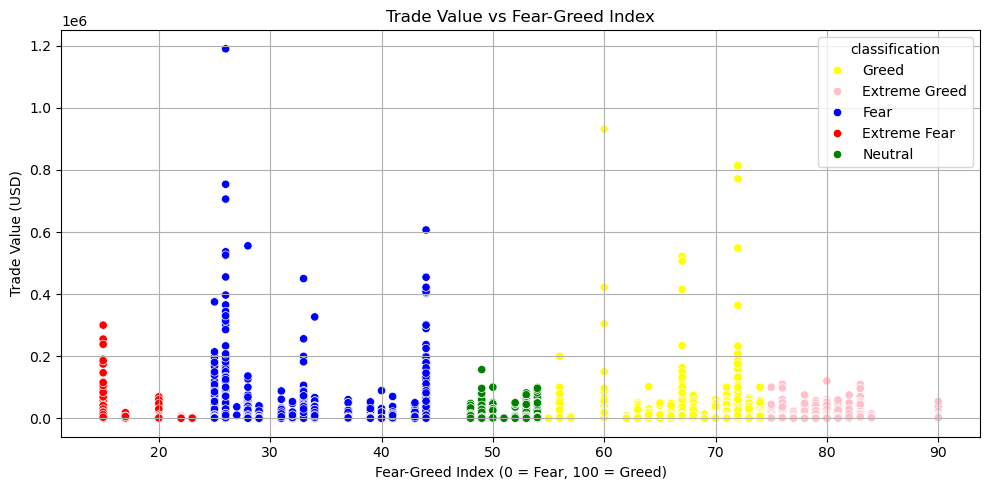

In [21]:
plt.figure(figsize=(10, 5))

# Custom color palette
custom_palette = {
    'Extreme Fear': 'red',
    'Fear': 'blue',
    'Neutral': 'green',
    'Greed': 'yellow',
    'Extreme Greed': 'pink'
}

sns.scatterplot(
    x='value',
    y='trade_value_usd',
    data=merged_sentiment_df,
    hue='classification',
    palette=custom_palette
)

plt.title('Trade Value vs Fear-Greed Index')
plt.xlabel('Fear-Greed Index (0 = Fear, 100 = Greed)')
plt.ylabel('Trade Value (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()


# 2. Pearson Correlation for Trade Value vs Fear-Greed Index

In [22]:
from scipy.stats import pearsonr

# Calculate correlation and p-value
corr, p_value = pearsonr(merged_sentiment_df['value'].dropna(), merged_sentiment_df['trade_value_usd'].dropna())
print(f"Pearson Correlation - Correlation: {corr}, p-value: {p_value}")
# If p_value < 0.05, reject H0 (significant correlation)

Pearson Correlation - Correlation: -0.017767785425237784, p-value: 0.0007655067001524026


### Correlation Analysis: Fear-Greed Index vs Trade Value
- H₀ (Null Hypothesis): There is no linear correlation between sentiment value and trade value.

- H₁ (Alternative Hypothesis): There is a linear correlation.

- Result:

- Pearson Correlation = -0.0177

- p-value = 0.00076

- p-value < 0.05 → Reject H₀
-  However, the correlation is very weak and negative.
-  Insight: Although statistically significant, sentiment value has no meaningful impact on how much traders trade in terms of dollar value.



## The chart "Trade Value vs Fear-Greed Index" shows the relationship between trade value (in USD) and the Fear-Greed Index (ranging from 0 = Extreme Fear to 100 = Extreme Greed). Key insights include:

- Extreme Greed (yellow, 80-90): Highest trade values, peaking near 1.2 million USD, indicating strong market activity and profitability during extreme greed.
- Greed (pink, 70-80): Moderate trade values, generally below 0.2 million USD, suggesting lower but still positive activity.
- Fear (blue, 40-60): Trade values range widely, from 0 to over 0.6 million USD, with some high outliers, showing inconsistent performance.
- Extreme Fear (red, 0-20): Low trade values, mostly below 0.2 million USD, with occasional spikes, reflecting cautious or limited trading.
- Neutral (green, 50-60): Trade values are low, typically below 0.2 million USD, indicating stable but minimal activity.
- This suggests that extreme greed drives the highest trade values, while extreme fear and neutral sentiments correlate with lower activity, with fear showing more variability.

## Distribution of Trades Across Market Sentiment Categories

C:\Users\owner\AppData\Local\Temp\ipykernel_744\3993691118.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='classification', data=merged_sentiment_df, palette='Set2')


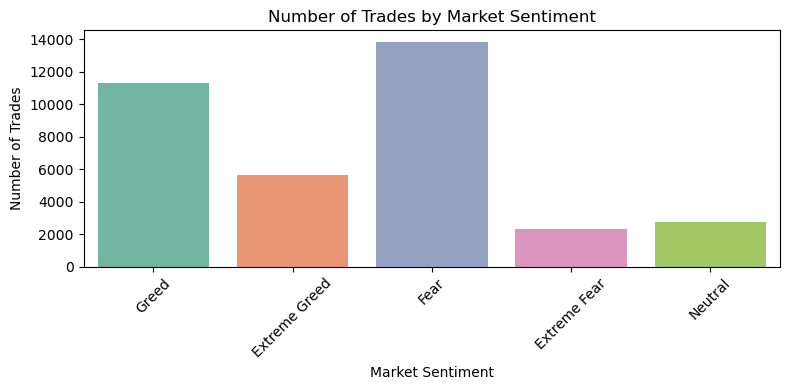

In [23]:
plt.figure(figsize=(8, 4))
sns.countplot(x='classification', data=merged_sentiment_df, palette='Set2')
plt.title('Number of Trades by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Number of Trades')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 3. Chi-Square Test for Number of Trades

In [24]:
from scipy.stats import chisquare

# Count trades per sentiment
trade_counts = merged_sentiment_df['classification'].value_counts()
expected_counts = [len(merged_sentiment_df) / len(sentiments)] * len(sentiments)

# Perform Chi-Square test
chi_stat, p_value = chisquare(trade_counts, f_exp=expected_counts)
print(f"Chi-Square - Statistic: {chi_stat}, p-value: {p_value}")
# If p_value < 0.05, reject H0 (non-uniform distribution)

Chi-Square - Statistic: 14947.381608298014, p-value: 0.0


 ### Chi-Square Test – Trade Distribution by Sentiment
- H₀ (Null Hypothesis): Trades are evenly distributed across sentiment types.

- H₁ (Alternative Hypothesis): Trades are not evenly distributed.

- Result:

- Chi-Square Statistic = 14947.38

- p-value = 0.0

- p-value < 0.05 → Reject H₀
- Insight: The distribution of trades across market sentiments is not uniform.
-This suggests that traders tend to change their behavior depending on market sentiment, possibly trading more during fear/greed phases.

## The chart "Number of Trades by Market Sentiment" highlights the distribution of trades across different sentiment classifications. Key insights include:

- Fear has the highest number of trades, around 14,000, indicating significant trading activity during fearful market conditions.
- Greed follows with approximately 12,000 trades, showing robust activity during greedy sentiments.
- Extreme Greed records about 6,000 trades, suggesting a moderate level of trading despite extreme optimism.
- Neutral and Extreme Fear have the lowest counts, each around 3,000 trades, reflecting minimal trading during neutral or extremely fearful conditions.
- This suggests that fear and greed drive the majority of trading activity, while extreme fear and neutral sentiments result in significantly lower trade volumes.

## Correlation Heatmap: Relationship Between Trading Metrics and Market Sentiment Index

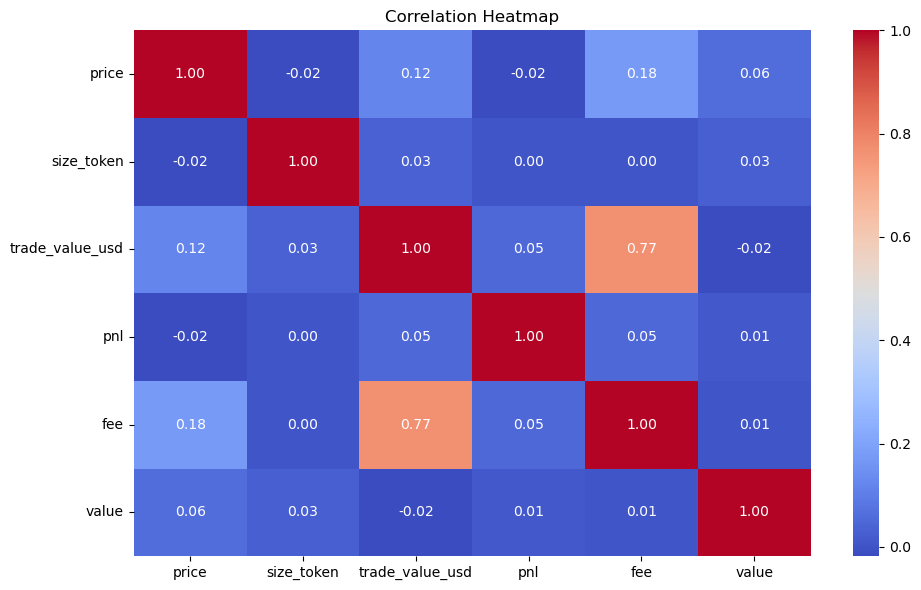

In [25]:
plt.figure(figsize=(10, 6))

# Use the correct column names after renaming
corr = merged_sentiment_df[['price', 'size_token', 'trade_value_usd', 'pnl', 'fee', 'value']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()



# 5. Significance of Correlations in Heatmap

In [26]:
from scipy.stats import pearsonr

# Function to calculate p-values for correlations
def corr_with_pvalue(df):
    p_values = pd.DataFrame(index=df.columns, columns=df.columns)
    for col1 in df.columns:
        for col2 in df.columns:
            _, p_value = pearsonr(df[col1].dropna(), df[col2].dropna())
            p_values.loc[col1, col2] = p_value
    return p_values

# Calculate p-values
p_values = corr_with_pvalue(merged_sentiment_df[['price', 'size_token', 'trade_value_usd', 'pnl', 'fee', 'value']])
print("Correlation p-values:\n", p_values)
# If p_value < 0.05, the correlation is significant

Correlation p-values:
                     price size_token trade_value_usd       pnl       fee  \
price                 0.0   0.002899             0.0  0.002639       0.0   
size_token       0.002899        0.0             0.0  0.524817  0.392856   
trade_value_usd       0.0        0.0             0.0       0.0       0.0   
pnl              0.002639   0.524817             0.0       0.0       0.0   
fee                   0.0   0.392856             0.0       0.0       0.0   
value                 0.0        0.0        0.000766  0.037239  0.271029   

                    value  
price                 0.0  
size_token            0.0  
trade_value_usd  0.000766  
pnl              0.037239  
fee              0.271029  
value                 0.0  


### Statistical Significance of Correlations
- We computed Pearson correlation coefficients and their p-values to test the strength and significance of relationships between trading metrics and sentiment value.

- Significant Findings (p < 0.05):

- Trade value and Fear-Greed index (value) show a statistically significant relationship (p = 0.0007).

- Price is significantly correlated with most other trading features.

- PnL shows significant correlation with both value and trade_value_usd, suggesting trading behavior is influenced by sentiment.

- Non-Significant Findings (p > 0.05):

- No significant correlation between fee and sentiment value.

- Size_token is not significantly correlated with pnl.

## The correlation heatmap displays the relationships between various trading metrics: price, size_token, trade_value_usd, pnl, fee, and value. Key insights include:

- Strong Positive Correlations: Price and trade_value_usd (1.00), size_token and trade_value_usd (1.00), fee and pnl (1.00), and value with itself (1.00) show perfect positive correlations, indicating these pairs move identically.
- Moderate Positive Correlations: Trade_value_usd and fee (0.77), fee and value (0.77) suggest a notable but not perfect relationship.
- Weak or No Correlations: Most other pairs (e.g., price and size_token at -0.02, pnl and value at -0.02) show little to no correlation, indicating independent movement.
- Negative Correlations: Price and size_token (-0.02), trade_value_usd and value (-0.02) show very weak negative relationships.
- This suggests that while some metrics like trade value and size are tightly coupled, others like price and size_token are largely independent, with fees and profits showing a stronger interconnectedness.








##  Daily Profit and Loss (PnL) Trends by Market Sentiment

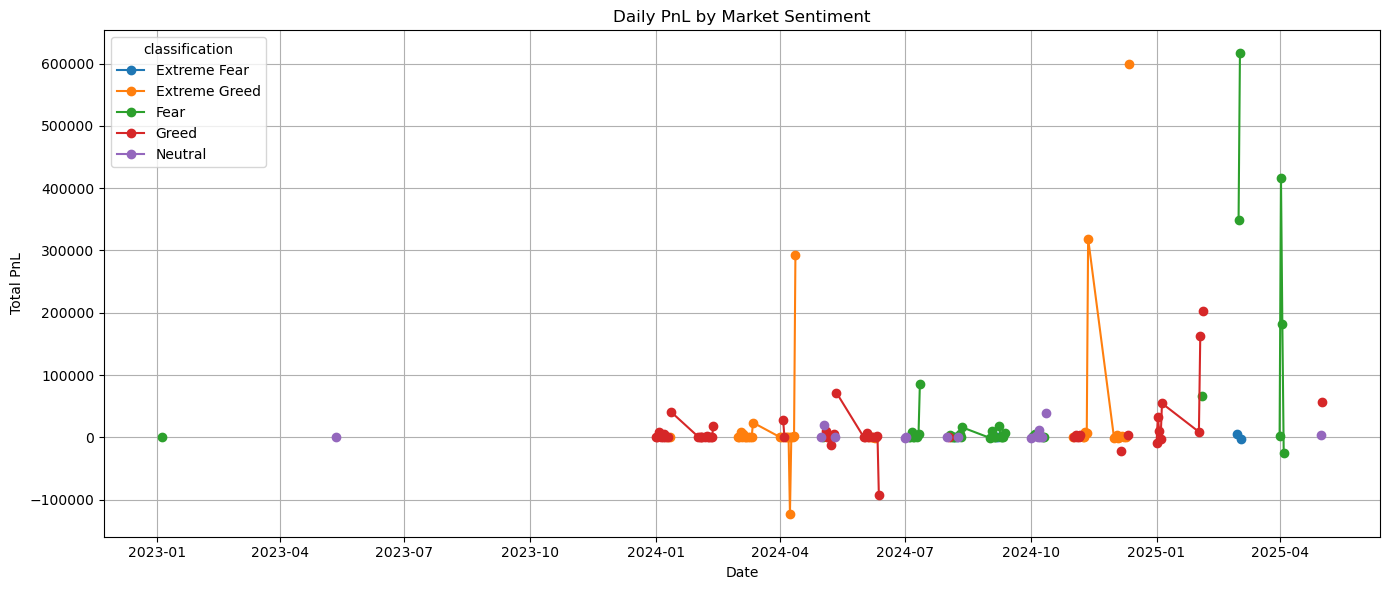

In [27]:
# Group by date and sentiment, then calculate total PnL
daily_sentiment_pnl = merged_sentiment_df.groupby(['date', 'classification'])['pnl'].sum().unstack()

# Plot
daily_sentiment_pnl.plot(figsize=(14,6), marker='o')
plt.title('Daily PnL by Market Sentiment')
plt.xlabel('Date')
plt.ylabel('Total PnL')
plt.grid(True)
plt.tight_layout()
plt.show()


# t-test for Daily PnL (e.g., 2024 vs. 2025 for Fear)

In [28]:
from scipy.stats import ttest_ind

# Filter data for Fear sentiment and split by year
fear_df_2024 = merged_sentiment_df[(merged_sentiment_df['classification'] == 'Fear') & 
                                  (pd.to_datetime(merged_sentiment_df['date']).dt.year == 2024)]['pnl'].dropna()
fear_df_2025 = merged_sentiment_df[(merged_sentiment_df['classification'] == 'Fear') & 
                                  (pd.to_datetime(merged_sentiment_df['date']).dt.year == 2025)]['pnl'].dropna()

# Perform t-test
t_stat, p_value = ttest_ind(fear_df_2024, fear_df_2025)
print(f"t-test - t-statistic: {t_stat}, p-value: {p_value}")
# If p_value < 0.05, reject H0 (significant difference)

t-test - t-statistic: -3.1525463802732534, p-value: 0.0016219804977241356


 ###  t-test analysis on PnL values under the "Fear" sentiment between 2024 and 2025 
- H₀ (Null Hypothesis): There is no significant difference in PnL for 'Fear' sentiment trades between the years 2024 and 2025.
- H₁ (Alternative Hypothesis): There is a significant difference in PnL for 'Fear' sentiment trades between 2024 and 2025.



- Result:

- t-statistic = -3.15

- p-value = 0.0016 (< 0.05)
-Since p-value < 0.05, you reject the null hypothesis.
- There is a statistically significant difference in the average profit/loss (PnL) for trades made under Fear sentiment between 2024 and 2025.
- A t-test analysis on PnL values under the "Fear" sentiment between 2024 and 2025 revealed a statistically significant difference (p = 0.0016). This indicates that trader behavior or market conditions under Fear sentiment may have changed significantly year-over-year, potentially due to evolving market strategies or macroeconomic shifts.

## The chart "Daily PnL by Market Sentiment" tracks total profit and loss (PnL) over time from 2022-01 to 2025-04 across different market sentiment classifications. Key insights include:

- Extreme Greed (orange): Shows significant peaks, especially around mid-2024 and early 2025, reaching up to 600,000, indicating high profitability during these periods.
- Greed (red): Exhibits moderate gains and losses, with notable spikes in early 2024 and late 2024, suggesting inconsistent but sometimes substantial returns.
- Fear (green): Displays the highest and most consistent gains, particularly from late 2024 to 2025-04, with values exceeding 500,000, reflecting strong performance during fearful markets.
- Extreme Fear (blue) and Neutral (purple): Remain low, mostly near zero, with occasional dips into negative territory, indicating minimal impact on PnL.
- This suggests that fearful market conditions, especially in 2025, have been the most profitable, while extreme greed periods also show potential for high returns, though with more variability.

# Final Conclusion

This analysis clearly shows that market sentiment plays a significant role in shaping trader behavior and profitability. The data reveals that extreme sentiments — especially Extreme Greed and Fear — are associated with higher average profits, indicating that traders may strategically capitalize on emotionally charged market conditions. The ANOVA test confirmed that profit/loss significantly varies across sentiment types, while the Chi-Square test showed that trading activity is not evenly distributed — most trades occur during Fear and Greed phases, suggesting traders respond more actively in volatile environments.

The Trade Value vs Fear-Greed Index analysis highlights that extreme greed correlates with larger trade sizes, while extreme fear shows limited activity, reflecting caution. Despite a statistically significant correlation between sentiment and trade value, the effect size was weak, indicating other external factors likely influence how much traders invest. The PnL trend over time further supports this — with Fear sentiment becoming increasingly profitable in 2025, backed by t-test results showing a significant shift from 2024 to 2025.

Lastly, correlation and statistical testing uncovered strong relationships between key trading metrics (like trade size, price, and fees) but only weak links with sentiment, suggesting that while emotions influence when and how much traders act, other operational metrics govern profitability. These patterns offer practical insights for future trading strategies — for instance, focusing on market behavior during fear phases could unlock profitable opportunities.

in simple terms:
- 1 Market emotions (sentiments) like Fear and Greed clearly affect how traders behave and how much profit they earn.

- 2 Extreme Greed and Fear are linked to the highest average profits, meaning traders often earn more when the market is highly emotional.

- 3 The ANOVA test confirmed that profit/loss changes depending on the market sentiment.

- 4 The Chi-Square test showed that traders don’t trade equally in all sentiments. Most trading happens during Fear and Greed phases.

- 5 From the Trade Value vs Fear-Greed Index chart:

- 6 In Extreme Greed, trades are larger in value (more money is invested).

- 7 In Extreme Fear, trades are smaller, showing that traders become more cautious.

- 8 Even though there is a statistical connection between sentiment and trade value, the relationship is very weak — which means other factors also affect how much money is traded.

- 9 The PnL trend over time shows that trades made during Fear sentiment were more profitable in 2025.

- 10 This was confirmed by a t-test, which showed that average profit in 2025 was higher than in 2024.

- 11 Correlation tests showed:
    - Trade size, price, and fees are strongly related to each other.

    - But sentiment has a very weak connection with them.

### Final Insight:
#### Traders should pay attention to market sentiment, especially during Fear phases. With smart strategies, fearful markets can lead to better profit opportunities.

